In [1]:
import cv2

In [7]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [8]:
from deepface import DeepFace

In [2]:
img = cv2.imread('Happyboy.jpg')

In [3]:
import matplotlib.pyplot as plt

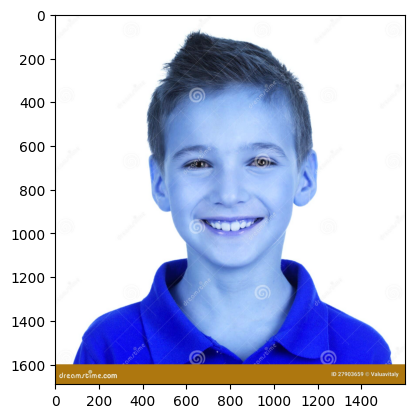

In [4]:
plt.imshow(img) #BGR

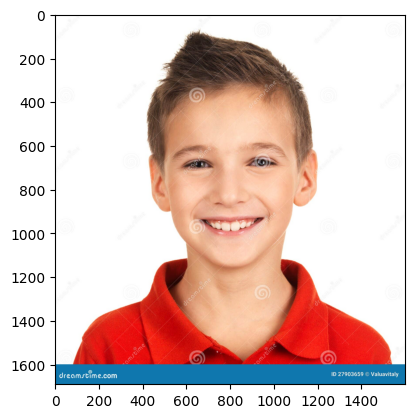

In [5]:
plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))

In [9]:
predictions = DeepFace.analyze(img , actions= ['emotion'])

In [10]:
predictions

[{'emotion': {'angry': np.float32(1.0019859e-12),
   'disgust': np.float32(5.0950425e-15),
   'fear': np.float32(5.525675e-10),
   'happy': np.float32(99.999214),
   'sad': np.float32(3.7412626e-10),
   'surprise': np.float32(3.0163507e-09),
   'neutral': np.float32(0.0007854519)},
  'dominant_emotion': 'happy',
  'region': {'x': 407,
   'y': 361,
   'w': 806,
   'h': 806,
   'left_eye': (935, 676),
   'right_eye': (647, 689)},
  'face_confidence': np.float64(0.9)}]

In [11]:
pred = predictions[0]
pred

{'emotion': {'angry': np.float32(1.0019859e-12),
  'disgust': np.float32(5.0950425e-15),
  'fear': np.float32(5.525675e-10),
  'happy': np.float32(99.999214),
  'sad': np.float32(3.7412626e-10),
  'surprise': np.float32(3.0163507e-09),
  'neutral': np.float32(0.0007854519)},
 'dominant_emotion': 'happy',
 'region': {'x': 407,
  'y': 361,
  'w': 806,
  'h': 806,
  'left_eye': (935, 676),
  'right_eye': (647, 689)},
 'face_confidence': np.float64(0.9)}

In [12]:
pred['dominant_emotion']

'happy'

In [13]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [14]:
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
faces = faceCascade.detectMultiScale(gray,1.1,4)

    # Draw a rectangle around the faces
for(x, y, w, h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0) ,2)

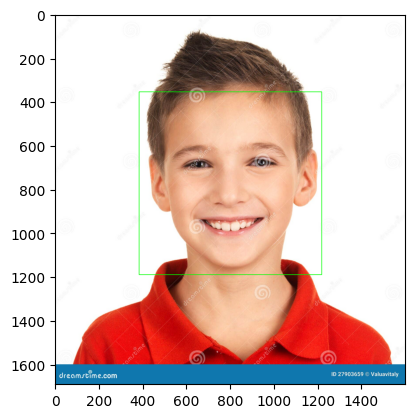

In [15]:
plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))

In [16]:
font = cv2.FONT_HERSHEY_SIMPLEX

    #use putText() method for inserting text on video
cv2.putText(img, pred['dominant_emotion'], (0,50), font, 3, (0,0,255) , 2, cv2.LINE_4 );

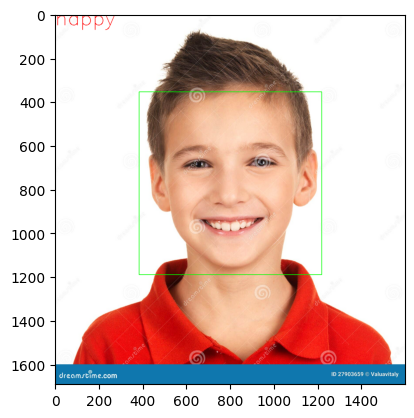

In [17]:
plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))

In [2]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [ ]:
import cv2
from deepface import DeepFace

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)
#check if the webcam is opened correctly
if not cap.isOpened() :
    cap = cv2.VideoCapture(0)
if not cap.isOpened() :
    cap = IOError("Cannot Open Camera")
    
while True :
    ret , frame = cap.read() #read one image from a video
    result = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)
    pred = result[0]
    dominant_emotion = pred['dominant_emotion']
    
    # Convert frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the dominant emotion
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, dominant_emotion, (50, 50), font, 1, (0, 0, 255), 2, cv2.LINE_AA)

    # Show the video feed with annotations
    cv2.imshow('Emotion Recognition', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()